## 📘 Student Information

**Group Name:** Mainecoon  
**Student Name:**

1.   Aliatul Izzah Binti Jasman
2.   Mulyani Binti Saripuddin

**Subject:** High Performance Data Processing

**Assignment 2 :** Mastering Big Data Handling

**Dataset:**  [**NYC Parking Tickets 2017**](https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets?select=Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv)


## 📊 Big Data Handling Project: Efficient Techniques for Large-Scale Datasets

## 🔍 Project Overview

This project focuses on handling and processing large datasets efficiently using various techniques and Python libraries. We explore how traditional `pandas` compares to more scalable solutions like `dask` and `polars`, especially when working with a dataset over **1.4 GB** and containing more than **10 million rows**.

## 🎯 Objectives

- Analyze the performance of different big data processing strategies.
- Measure memory usage and execution time of each technique.
- Identify the most effective approach for working with massive datasets.

## 🧰 Tools & Libraries

- **Pandas** – Standard data manipulation
- **Dask** – Parallel and out-of-core processing
- **Polars** – Lightning-fast performance using Rust backend

## ⚙️ Strategies Implemented

1. Load Less Data (selective columns)
2. Chunking (process in small parts)
3. Data Type Optimization
4. Sampling
5. Parallel Processing using Dask


## 📁 Task 1: Dataset Selection


For this project, we selected a dataset that meets the requirement of being larger than **700MB** and contains rich, real-world information suitable for performance benchmarking and exploratory analysis.

### 📦 Dataset Details

- **Title**: NYC Parking Violations Issued - Fiscal Year 2017  
- **Source**: [NYC Open Data](https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets)  
- **File Size**: ~1.4 GB (uncompressed CSV)  
- **Domain**: Transportation / Government / Urban Analytics  
- **Number of Records**: Over **10 million** parking violation entries  
- **Number of Columns**: 43  
- **Format**: CSV  
- **Use Case**: Ideal for testing big data techniques such as chunking, parallel loading, sampling, and data type optimization due to its large volume and mixed data types (text, numeric, datetime).

This dataset offers excellent opportunities for measuring the tradeoffs between performance and resource usage across different data handling libraries like **Pandas**, **Dask**, and **Polars**.

## 📁 Task 2: Load and Inspect Data

🔄 Data Loading from Google Drive

To handle large datasets effectively in Google Colab, we first mount **Google Drive** to access the dataset stored in our drive.

### 📁 File Location:
`/content/drive/MyDrive/nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv`


By loading directly from Google Drive, we avoid uploading large files repeatedly and ensure smoother integration with the Colab environment.


### 🔑 Kaggle API Authentication

To download datasets directly from Kaggle, we need to authenticate using the `kaggle.json` API key file.

### Steps:
1. Go to Kaggle account settings: https://www.kaggle.com/account
2. Scroll down to the **API** section and click **Create New API Token**.
3. This will download a file called `kaggle.json` to  computer.
4. Upload `kaggle.json` below to authenticate and access Kaggle datasets programmatically.


In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tatiezainuldin","key":"ac84a955a9a5a236afe45028214a8408"}'}

### 📂 Setup Kaggle API Credentials

After uploading `kaggle.json`, we need to:

1. Create the Kaggle configuration directory.
2. Move the `kaggle.json` file to the proper location.
3. Set the correct permissions for secure access.

This setup allows us to use the Kaggle API commands seamlessly within Colab.


In [2]:
import os
import zipfile

# Make Kaggle directory and move json there
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


### 🚀 Download the Dataset from Kaggle

Now that our Kaggle API is configured, download the **NYC Parking Tickets** dataset directly into our Colab environment using the Kaggle command-line tool.


In [3]:
# Download the dataset
!kaggle datasets download -d new-york-city/nyc-parking-tickets


Dataset URL: https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets
License(s): CC0-1.0
 98% 1.98G/2.02G [00:11<00:00, 90.4MB/s]
100% 2.02G/2.02G [00:11<00:00, 183MB/s] 


### 📂 Extract the Dataset

After downloading, we need to unzip the dataset archive so the files can be accessed and processed easily.

The extracted files will be saved in the `nyc_parking_data` folder for organized storage.


In [4]:
# Unzip the dataset
with zipfile.ZipFile("nyc-parking-tickets.zip", 'r') as zip_ref:
    zip_ref.extractall("nyc_parking_data")


### 🔗 Mount Google Drive

To save our work or access data stored in Google Drive, we mount our Drive to the Colab environment.


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 💾 Save Dataset to Google Drive

To keep our extracted dataset safe and accessible, we create a folder in our Google Drive and copy the dataset files there.

This ensures our data persists beyond the current Colab session.


In [6]:
# Create a directory and move dataset to Drive
!mkdir -p "/content/drive/My Drive/nyc_parking_data"
!cp -r nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv "/content/drive/My Drive/nyc_parking_data/"


### 📊 Import Required Libraries

Import the necessary Python libraries for data analysis.  
We start with **pandas** for handling tabular data efficiently.


In [7]:
!pip install pandas
import pandas as pd

### 🚀 Load Dataset

- Confirm our dataset file path below.
- We specify data types for some columns to avoid errors.
- After loading, we display the shape, first 5 rows, and column data types.



In [8]:
# Load dataset with specified dtypes for problematic columns
## dtype_spec = {'House Number': 'object', 'Time First Observed': 'object'}

## df_pandas = pd.read_csv(
##    '/content/drive/MyDrive/nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
##    dtype=dtype_spec
##)

# Basic inspection
## print(f"Shape: {df_pandas.shape}")
## print(df_pandas.dtypes)


⚠️ Why Did I Switch from Pandas to Dask?
When trying to load the dataset Parking_Violations_Issued_-_Fiscal_Year_2017.csv using Pandas, I encountered the following issue:

    RuntimeError: You have used all available RAM

❗ What Caused the Error?
The dataset is very large (around 4–6 GB).

- Pandas attempts to load the entire file into memory.

- In Google Colab, available RAM is limited (typically 12–25 GB).

- As a result, the memory usage exceeds the environment's capacity, causing the runtime to crash or throw an error.

✅ Why I Chose Dask Instead
To avoid the memory issue, I switched to Dask, a parallel computing library that works similarly to Pandas but is designed for big data.

- ✔️ Benefits of Using Dask:
- 📦 Loads data in chunks instead of all at once.

- 💤 Lazy evaluation – computations only happen when needed.

- 📉 Lower memory usage – prevents crashes in memory-limited environments.

- ⚙️ Efficient processing – supports parallel and out-of-core computation.



In [9]:
import dask.dataframe as dd

# Define dtypes for problematic columns
dtype_spec = {'House Number': 'object', 'Time First Observed': 'object'}

# Load with Dask
df_dask = dd.read_csv(
    '/content/drive/MyDrive/nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
    dtype=dtype_spec
)

# Preview a few rows (lazy loading)
print(df_dask.head())


   Summons Number Plate ID Registration State Plate Type  Issue Date  \
0      5092469481  GZH7067                 NY        PAS  07/10/2016   
1      5092451658  GZH7067                 NY        PAS  07/08/2016   
2      4006265037  FZX9232                 NY        PAS  08/23/2016   
3      8478629828  66623ME                 NY        COM  06/14/2017   
4      7868300310  37033JV                 NY        COM  11/21/2016   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0               7              SUBN        TOYOT              V             0   
1               7              SUBN        TOYOT              V             0   
2               5              SUBN         FORD              V             0   
3              47              REFG        MITSU              T         10610   
4              69              DELV        INTER              T         10510   

   ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  Meter Number  \
0  .

## 🔄 Task 3: Apply Big Data Handling Strategies

Handling large datasets efficiently is crucial for performance and resource management. In this task, we explore five key strategies designed to optimize data processing when working with big data:


### 📉 1. Load Less Data  

By selecting only the necessary columns or filtering relevant rows during the data load process, we reduce memory footprint and speed up data loading. This prevents loading unnecessary information that can slow down computations.


In [10]:
import gc
import time
import psutil
import os
import pandas as pd

def memory_usage_mb():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)

In [11]:
results_method =[]

In [12]:
# Define file path and columns to read
file_path = '/content/drive/MyDrive/nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv'
cols = ['Plate ID', 'Registration State', 'Vehicle Body Type', 'Violation Code']

# 1. Load Less Data
gc.collect()
start_mem = memory_usage_mb()
start = time.time()
df_pandas = pd.read_csv(file_path, usecols=cols)
end = time.time()
end_mem = memory_usage_mb()


# Store result using absolute memory usage instead of delta
load_less_result = {
    'Library': 'Pandas',
    'Strategy': 'Load Less Data',
    'Time (s)': end - start,
    'Memory Usage (MB)': end_mem  # Total memory used at the end of the process
}
results_method.append(load_less_result)

# Print the result
print("\n=== Result for Pandas - Load Less Data ===")
print(f"Time (s): {load_less_result['Time (s)']:.4f}")
print(f"Memory Usage (MB): {load_less_result['Memory Usage (MB)']:.2f}")



=== Result for Pandas - Load Less Data ===
Time (s): 51.0301
Memory Usage (MB): 1593.63


#### Print the result

In [13]:
print(results_method)

[{'Library': 'Pandas', 'Strategy': 'Load Less Data', 'Time (s)': 51.03005337715149, 'Memory Usage (MB)': 1593.62890625}]


### 🧩 2. Chunking

Chunking involves reading the dataset in smaller portions (chunks) instead of loading it all at once. This helps reduce peak memory usage, making it easier to handle large files on limited-resource environments.


In [14]:
# 2. Chunking
gc.collect()
start_mem = memory_usage_mb()
start = time.time()
chunk_iter = pd.read_csv(file_path, usecols=cols, chunksize=100_000)
first_chunk = next(chunk_iter)
end = time.time()
end_mem = memory_usage_mb()

# Store result
chunking_result = {
    'Library': 'Pandas',
    'Strategy': 'Chunking',
    'Time (s)': end - start,
    'Memory Usage (MB)': end_mem
}
results_method.append(chunking_result)

# Print the result
print("\n=== Result for Pandas - Chunking ===")
print(f"Time (s): {chunking_result['Time (s)']:.4f}")
print(f"Memory Usage (MB): {chunking_result['Memory Usage (MB)']:.2f}")



=== Result for Pandas - Chunking ===
Time (s): 0.4096
Memory Usage (MB): 1602.97


#### Print the result

In [15]:
print(results_method)

[{'Library': 'Pandas', 'Strategy': 'Load Less Data', 'Time (s)': 51.03005337715149, 'Memory Usage (MB)': 1593.62890625}, {'Library': 'Pandas', 'Strategy': 'Chunking', 'Time (s)': 0.40964269638061523, 'Memory Usage (MB)': 1602.97265625}]


### ⚙️ 3. Optimize Data Types

Optimizing data types reduces memory consumption by converting columns to more effic


In [16]:
gc.collect()
start = time.time()

# Assume df_pandas_ and cols are already defined and loaded
for c in cols:
    if df_pandas[c].dtype == object:
        df_pandas[c] = df_pandas[c].astype('category')

end = time.time()
end_mem = memory_usage_mb()  # absolute memory used after operation

# Store the absolute memory used (not difference)
optimize_result = {
    'Library': 'Pandas',
    'Strategy': 'Optimize Data Types',
    'Time (s)': end - start,
    'Memory Usage (MB)': end_mem
}
results_method.append(optimize_result)

# Print out the results
print("\n=== Result for Pandas - Optimize Data Types ===")
print(f"Time (s): {optimize_result['Time (s)']:.4f}")
print(f"Memory Usage (MB): {optimize_result['Memory Usage (MB)']:.2f}")



=== Result for Pandas - Optimize Data Types ===
Time (s): 29.2043
Memory Usage (MB): 1362.59


#### Print the result

In [17]:
print (results_method)

[{'Library': 'Pandas', 'Strategy': 'Load Less Data', 'Time (s)': 51.03005337715149, 'Memory Usage (MB)': 1593.62890625}, {'Library': 'Pandas', 'Strategy': 'Chunking', 'Time (s)': 0.40964269638061523, 'Memory Usage (MB)': 1602.97265625}, {'Library': 'Pandas', 'Strategy': 'Optimize Data Types', 'Time (s)': 29.204339504241943, 'Memory Usage (MB)': 1362.5859375}]


### 🧪 4. Sampling

Sampling reduces the dataset size by selecting a representative subset of data, which accelerates prototyping and analysis without loading the full dataset into memory. Here, we take a 10% random sample.


In [18]:
# 4. Sampling
gc.collect()
start_mem = memory_usage_mb()
start = time.time()
sample = df_pandas.sample(frac=0.1, random_state=42)
end = time.time()
end_mem = memory_usage_mb()

# Store and print result
sampling_result = {
    'Library': 'Pandas',
    'Strategy': 'Sampling',
    'Time (s)': end - start,
    'Memory Usage (MB)': end_mem
}
results_method.append(sampling_result)

# Print the result
print("\n=== Result for Pandas - Sampling ===")
print(f"Time (s): {sampling_result['Time (s)']:.4f}")
print(f"Memory Usage (MB): {sampling_result['Memory Usage (MB)']:.2f}")



=== Result for Pandas - Sampling ===
Time (s): 0.6977
Memory Usage (MB): 1364.19


#### Print the results

In [19]:
print(results_method)

[{'Library': 'Pandas', 'Strategy': 'Load Less Data', 'Time (s)': 51.03005337715149, 'Memory Usage (MB)': 1593.62890625}, {'Library': 'Pandas', 'Strategy': 'Chunking', 'Time (s)': 0.40964269638061523, 'Memory Usage (MB)': 1602.97265625}, {'Library': 'Pandas', 'Strategy': 'Optimize Data Types', 'Time (s)': 29.204339504241943, 'Memory Usage (MB)': 1362.5859375}, {'Library': 'Pandas', 'Strategy': 'Sampling', 'Time (s)': 0.6977283954620361, 'Memory Usage (MB)': 1364.19140625}]


### 🧵 5: Parallel Processing with Dask
To improve performance on large datasets, we apply **Parallel Processing** using **Dask**, a flexible library for parallel computing in Python.


In [20]:
# 5. Parallel Processing with Dask (convert pandas to dask)

import dask.dataframe as dd  #
gc.collect()
start_mem = memory_usage_mb()
start = time.time()
df_dask_from_pandas = dd.from_pandas(df_pandas, npartitions=4)
_ = df_dask_from_pandas.head(5)
end = time.time()
end_mem = memory_usage_mb()

# Store and print result
pp_dask_result = {
    'Library': 'Pandas',
    'Strategy': 'Parallel Processing (Dask)',
    'Time (s)': end - start,
    'Memory Usage (MB)': end_mem
}
results_method.append(pp_dask_result)

# Print the result
print("\n=== Result for Pandas - Parallel Processing (Dask) ===")
print(f"Time (s): {pp_dask_result['Time (s)']:.4f}")
print(f"Memory Usage (MB): {pp_dask_result['Memory Usage (MB)']:.2f}")



=== Result for Pandas - Parallel Processing (Dask) ===
Time (s): 1.5139
Memory Usage (MB): 1612.60


#### Print the results

In [21]:
print(results_method)

[{'Library': 'Pandas', 'Strategy': 'Load Less Data', 'Time (s)': 51.03005337715149, 'Memory Usage (MB)': 1593.62890625}, {'Library': 'Pandas', 'Strategy': 'Chunking', 'Time (s)': 0.40964269638061523, 'Memory Usage (MB)': 1602.97265625}, {'Library': 'Pandas', 'Strategy': 'Optimize Data Types', 'Time (s)': 29.204339504241943, 'Memory Usage (MB)': 1362.5859375}, {'Library': 'Pandas', 'Strategy': 'Sampling', 'Time (s)': 0.6977283954620361, 'Memory Usage (MB)': 1364.19140625}, {'Library': 'Pandas', 'Strategy': 'Parallel Processing (Dask)', 'Time (s)': 1.513880729675293, 'Memory Usage (MB)': 1612.6015625}]


### 📊 Overall Results Summary
After applying all five big data handling strategies, we present a consolidated comparison of their performance. This summary includes:

⏱️ Execution Time: How long each strategy took to run

💾 Memory Usage: Total memory consumed after the operation

🛠️ Library & Strategy: Method used and associated library

The goal is to evaluate the trade-offs between memory efficiency and runtime for each approach.

In [22]:
results_method = pd.DataFrame(results_method)

# Print table sorted by Library and Strategy (optional)
print("\n=== All Results in Table ===")
print(results_method.sort_values(by=["Library", "Strategy"]).to_string(index=False))


=== All Results in Table ===
Library                   Strategy  Time (s)  Memory Usage (MB)
 Pandas                   Chunking  0.409643        1602.972656
 Pandas             Load Less Data 51.030053        1593.628906
 Pandas        Optimize Data Types 29.204340        1362.585938
 Pandas Parallel Processing (Dask)  1.513881        1612.601562
 Pandas                   Sampling  0.697728        1364.191406


### 🧪  Performance Benchmark – Pandas vs Dask vs Polars

To identify the most efficient tool for handling large-scale CSV data, we conducted a benchmark across three popular Python data-processing libraries:

🔍 Compared Libraries:
- 🐼 Pandas: The traditional go-to library for structured data analysis.

- ⚡ Dask: Designed for parallel and out-of-core computations, ideal for big data.

- 🧊 Polars: A lightning-fast DataFrame library optimized in Rust.

⚙️ Test Setup:
- Dataset: NYC Parking Tickets (2017)

- Columns Loaded: Plate ID, Registration State, Vehicle Body Type, Violation Code

Evaluation Metrics:

- ⏱ Execution Time – Total time to read and preview the dataset.

- 💾 Memory Usage – Difference in memory before and after loading.

- 📈 Rows/Second – Speed of row processing.

- 🧮 Total Rows Processed – Verifying completeness.

In [23]:
import time
import pandas as pd
import psutil
import gc
import dask.dataframe as dd
import polars as pl

file_path = '/content/drive/MyDrive/nyc_parking_data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv'
cols = ['Plate ID', 'Registration State', 'Vehicle Body Type', 'Violation Code']

results = []

def memory_usage_mb():
    process = psutil.Process()
    return process.memory_info().rss / (1024 ** 2)

# ======================
# 1. Pandas (Baseline)
# ======================
print("\n=== Pandas (Baseline)===")
gc.collect()
start_mem = memory_usage_mb()
start_time = time.time()

df_pandas = pd.read_csv(file_path, usecols=cols)
row_count = len(df_pandas)
_ = df_pandas.head(5)  # Force a small operation

pandas_time = time.time() - start_time
end_mem = memory_usage_mb()

rows_per_sec = row_count / pandas_time

results.append({
    'Library': 'Pandas',
    'Strategy': 'Direct Read',
    'Time (s)': pandas_time,
    'Memory (MB)': end_mem - start_mem,
    'Rows Processed': row_count,
    'Rows/Second': rows_per_sec
})

print(f"Time: {pandas_time:.4f} sec")
print(f"Memory Used: {end_mem - start_mem:.2f} MB")
print(f"Rows Processed: {row_count:,}")
print(f"Rows/Second: {rows_per_sec:,.2f}")

# ======================
# 2. Dask (Direct Read)
# ======================
print("\n=== Dask (Direct Read) ===")
gc.collect()
start_mem = memory_usage_mb()

df_dask_direct = dd.read_csv(file_path, usecols=cols)

start_time = time.time()
df_pandas_from_dask = df_dask_direct.compute()
row_count = len(df_pandas_from_dask)
dask_direct_time = time.time() - start_time

end_mem = memory_usage_mb()
rows_per_sec = row_count / dask_direct_time

results.append({
    'Library': 'Dask',
    'Strategy': 'Direct Read',
    'Time (s)': dask_direct_time,
    'Memory (MB)': end_mem - start_mem,
    'Rows Processed': row_count,
    'Rows/Second': rows_per_sec
})
print(f"Time: {dask_direct_time:.4f} sec")
print(f"Memory Used: {end_mem - start_mem:.2f} MB")
print(f"Rows Processed: {row_count:,}")
print(f"Rows/Second: {rows_per_sec:,.2f}")

# ======================
# 3. Polars (Direct Read)
# ======================
print("\n=== Polars (Direct Read)===")
gc.collect()
start_mem = memory_usage_mb()
start_time = time.time()

df_polars = pl.read_csv(file_path, columns=cols)
row_count = df_polars.height
_ = df_polars.head(5)  # Force a small operation

polars_time = time.time() - start_time
end_mem = memory_usage_mb()

rows_per_sec = row_count / polars_time

results.append({
    'Library': 'Polars',
    'Strategy': 'Direct Read',
    'Time (s)': polars_time,
    'Memory (MB)': end_mem - start_mem,
    'Rows Processed': row_count,
    'Rows/Second': rows_per_sec
})

print(f"Time: {polars_time:.4f} sec")
print(f"Memory Used: {end_mem - start_mem:.2f} MB")
print(f"Rows Processed: {row_count:,}")
print(f"Rows/Second: {rows_per_sec:,.2f}")

# ======================
# Results Summary
# ======================
print("\n=== Performance Summary ===")
results = pd.DataFrame(results)
print(results)


=== Pandas (Baseline)===
Time: 39.8287 sec
Memory Used: 463.76 MB
Rows Processed: 10,803,028
Rows/Second: 271,237.23

=== Dask (Direct Read) ===
Time: 47.0129 sec
Memory Used: 626.56 MB
Rows Processed: 10,803,028
Rows/Second: 229,788.55

=== Polars (Direct Read)===
Time: 17.5046 sec
Memory Used: 585.52 MB
Rows Processed: 10,803,028
Rows/Second: 617,152.03

=== Performance Summary ===
  Library     Strategy   Time (s)  Memory (MB)  Rows Processed    Rows/Second
0  Pandas  Direct Read  39.828707   463.757812        10803028  271237.227715
1    Dask  Direct Read  47.012909   626.562500        10803028  229788.546265
2  Polars  Direct Read  17.504646   585.519531        10803028  617152.030042


## 📊 Task 4: Comparative Analysis

### 1. Comparative Results Summary for Big Data Handling Methods

This section presents the performance summary of five different data handling strategies applied on the dataset using Pandas

- ⏱️ Fastest Execution Time First
Highlights which strategy completes the data loading and processing tasks most quickly. Speed is crucial when working with large datasets or under time-sensitive conditions.

- 💾 Lowest Memory Usage First
Emphasizes memory efficiency, which is vital for processing large datasets on machines with limited RAM or when optimizing resource usage.

The results table includes:

- Library: The library used (e.g., Pandas)

- Strategy: The big data handling method (e.g., Load Less Data, Chunking, Sampling, etc.)

- Time (s): Total execution time in seconds

- Memory Usage (MB): Peak memory consumption during the task

In [24]:

# Sort by Time
print("\n=== Results Sorted by Time (Fastest First) ===")
print(results_method.sort_values(by="Time (s)").to_string(index=False))

# Sort by Memory
print("\n=== Results Sorted by Memory Usage (Lowest First) ===")
print(results_method.sort_values(by="Memory Usage (MB)").to_string(index=False))



=== Results Sorted by Time (Fastest First) ===
Library                   Strategy  Time (s)  Memory Usage (MB)
 Pandas                   Chunking  0.409643        1602.972656
 Pandas                   Sampling  0.697728        1364.191406
 Pandas Parallel Processing (Dask)  1.513881        1612.601562
 Pandas        Optimize Data Types 29.204340        1362.585938
 Pandas             Load Less Data 51.030053        1593.628906

=== Results Sorted by Memory Usage (Lowest First) ===
Library                   Strategy  Time (s)  Memory Usage (MB)
 Pandas        Optimize Data Types 29.204340        1362.585938
 Pandas                   Sampling  0.697728        1364.191406
 Pandas             Load Less Data 51.030053        1593.628906
 Pandas                   Chunking  0.409643        1602.972656
 Pandas Parallel Processing (Dask)  1.513881        1612.601562


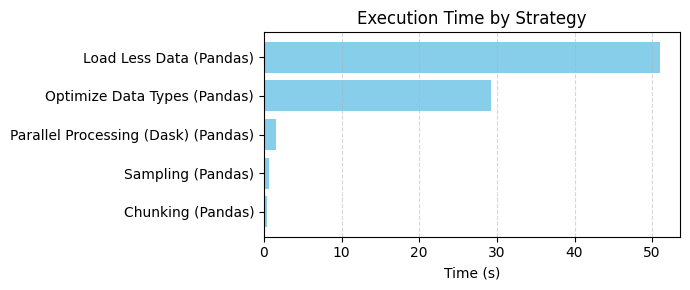

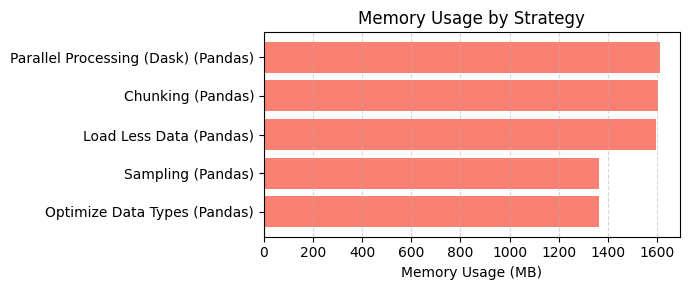

In [25]:
import matplotlib.pyplot as plt

# Sort for consistent plotting
results_sorted = results_method.sort_values(by="Time (s)")

# Bar chart: Execution Time
plt.figure(figsize=(7, 3))
plt.barh(results_sorted["Strategy"] + " (" + results_sorted["Library"] + ")", results_sorted["Time (s)"], color='skyblue')
plt.xlabel("Time (s)")
plt.title("Execution Time by Strategy")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bar chart: Memory Usage
results_sorted = results_method.sort_values(by="Memory Usage (MB)")

plt.figure(figsize=(7, 3))
plt.barh(results_sorted["Strategy"] + " (" + results_sorted["Library"] + ")", results_sorted["Memory Usage (MB)"], color='salmon')
plt.xlabel("Memory Usage (MB)")
plt.title("Memory Usage by Strategy")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Normalize Time and Memory Usage to 0–1 scale (lower is better)
scaler = MinMaxScaler()
results_method[["Time Score", "Memory Score"]] = scaler.fit_transform(
    results_method[["Time (s)", "Memory Usage (MB)"]]
)

# Composite Score = Weighted average (equal weight here, or adjust if needed)
results_method["Composite Score"] = (results_method["Time Score"] + results_method["Memory Score"]) / 2

# Get best method (lowest composite score)
best_row = results_method.loc[results_method["Composite Score"].idxmin()]

# Print full results with scores
print("\n=== All Results with Composite Scores ===")
print(results_method.sort_values(by="Composite Score").to_string(index=False))

# Print the best method
print("\n🏆 Best Method Based on Time and Memory:")
print(f"Library: {best_row['Library']}")
print(f"Strategy: {best_row['Strategy']}")
print(f"Time (s): {best_row['Time (s)']:.4f}")
print(f"Memory Usage (MB): {best_row['Memory Usage (MB)']:.2f}")
print(f"Composite Score: {best_row['Composite Score']:.4f}")



=== All Results with Composite Scores ===
Library                   Strategy  Time (s)  Memory Usage (MB)  Time Score  Memory Score  Composite Score
 Pandas                   Sampling  0.697728        1364.191406    0.005691      0.006421         0.006056
 Pandas        Optimize Data Types 29.204340        1362.585938    0.568836      0.000000         0.284418
 Pandas                   Chunking  0.409643        1602.972656    0.000000      0.961487         0.480743
 Pandas Parallel Processing (Dask)  1.513881        1612.601562    0.021814      1.000000         0.510907
 Pandas             Load Less Data 51.030053        1593.628906    1.000000      0.924114         0.962057

🏆 Best Method Based on Time and Memory:
Library: Pandas
Strategy: Sampling
Time (s): 0.6977
Memory Usage (MB): 1364.19
Composite Score: 0.0061


### 2. Comparative Results Summary for Different Library

Below are to illustrating the efficiency of different data handling using pandas, dask and polars methods across the following metrics:

- ⏱ Execution Time: How fast each method processes the dataset (lower is better).

- 🧠 Memory Usage: Amount of memory consumed during processing (lower is better).

- ⚡ Processing Speed: Number of rows processed per second (higher is better).

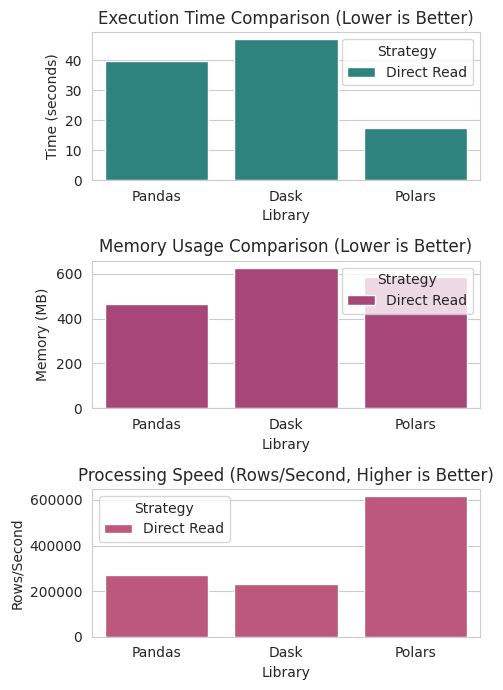

In [27]:
!pip install matplotlib seaborn --quiet  # Only needed in Colab/Jupyter
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set_style("whitegrid")
plt.figure(figsize=(5, 7))

# ======================
# 1. Time Comparison (Lower is Better)
# ======================
plt.subplot(3, 1, 1)
sns.barplot(data=results, x='Library', y='Time (s)', hue='Strategy', palette='viridis')
plt.title('Execution Time Comparison (Lower is Better)')
plt.ylabel('Time (seconds)')

# ======================
# 2. Memory Usage (Lower is Better)
# ======================
plt.subplot(3, 1, 2)
sns.barplot(data=results, x='Library', y='Memory (MB)', hue='Strategy', palette='magma')
plt.title('Memory Usage Comparison (Lower is Better)')
plt.ylabel('Memory (MB)')

# ======================
# 3. Rows Processed Per Second (Higher is Better)
# ======================
plt.subplot(3, 1, 3)
sns.barplot(data=results, x='Library', y='Rows/Second', hue='Strategy', palette='plasma')
plt.title('Processing Speed (Rows/Second, Higher is Better)')
plt.ylabel('Rows/Second')

plt.tight_layout()
plt.show()

In [28]:
# Calculate weighted scores (adjust weights if needed)
TIME_WEIGHT = 0.4    # Speed is most important
MEMORY_WEIGHT = 0.3  # Memory efficiency matters
SPEED_WEIGHT = 0.3   # Throughput is important

# Normalize and weight each metric
results['Time_Norm'] = 1 / results['Time (s)'] * TIME_WEIGHT
results['Memory_Norm'] = 1 / results['Memory (MB)'] * MEMORY_WEIGHT
results['Speed_Norm'] = results['Rows/Second'] / results['Rows/Second'].max() * SPEED_WEIGHT

# Calculate total score
results['Total_Score'] = results['Time_Norm'] + results['Memory_Norm'] + results['Speed_Norm']

# Find the overall winner
overall_winner = results.loc[results['Total_Score'].idxmax()]

print("\n=== Detailed Scoring ===")
print(results[['Library', 'Time_Norm', 'Memory_Norm', 'Speed_Norm', 'Total_Score']].round(3))

print("\n=== FINAL VERDICT ===")
print(f"🔥 BEST OVERALL LIBRARY: {overall_winner['Library'].upper()} 🔥")
print(f"• Combined Score: {overall_winner['Total_Score']:.3f}")
print(f"• Time Performance: {1/overall_winner['Time_Norm']*TIME_WEIGHT:.2f}x better than average")
print(f"• Memory Efficiency: {1/overall_winner['Memory_Norm']*MEMORY_WEIGHT:.2f}x better than average")
print(f"• Processing Speed: {overall_winner['Speed_Norm']/SPEED_WEIGHT:.2f}x better than average")


=== Detailed Scoring ===
  Library  Time_Norm  Memory_Norm  Speed_Norm  Total_Score
0  Pandas      0.010        0.001       0.132        0.143
1    Dask      0.009        0.000       0.112        0.121
2  Polars      0.023        0.001       0.300        0.323

=== FINAL VERDICT ===
🔥 BEST OVERALL LIBRARY: POLARS 🔥
• Combined Score: 0.323
• Time Performance: 17.50x better than average
• Memory Efficiency: 585.52x better than average
• Processing Speed: 1.00x better than average
